# Week 5
## GRPA 1


In [1]:
def kruskal(adj_list):
  mst = []
  edges = []
  for u in adj_list:
    for v, weight in adj_list[u]:
      edges.append((weight, u, v))
  edges.sort()
  return edges

  parent = {vertex: vertex for vertex in adj_list}

  def find(node):
    while parent[node] != node:
      node = parent[node]
    return node
  for weight, u, v in edges:
    root1 = find(u)
    root2 = find(v)
    if root1 != root2:
      parent[root1] = root2
      mst.append((u, v, weight))
  return mst

In [15]:
def create_undirected_adjacency_list(edges):
  vertices = set()
  for u, v, w in edges:
    vertices.add(u)
    vertices.add(v)

  adjacency_list = {}
  for v in vertices:
    adjacency_list[v] = []
  for u, v, w in edges:
    adjacency_list[u].append((v, w))  # u -> v (undirected graph)
    adjacency_list[v].append((u, w))  # v -> u (undirected graph)
  return adjacency_list

In [9]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if self.parent[root1] != root2:
      self.parent[root2] = root1
      return True
    return False

In [13]:
def kruskal(adj_list):
  mst = []
  edges = []

  for u in adj_list:
    for v, weight in adj_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adj_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [17]:
def fiber_link(adjacency_list):
  mst = kruskal(adjacency_list)
  fiber_length = 0
  for u, v, weight in mst:
    fiber_length += weight
  return fiber_length

In [19]:
# Test cases

edges = [(0, 1, 10), (0, 2, 50), (0, 3, 300), (5, 6, 45), (2, 1, 30),
         (6, 4, 37), (1, 6, 65), (2, 5, 76), (1, 3, 40), (3, 4, 60), (2, 4, 20)]
fiber_link(create_undirected_adjacency_list(edges)) == 182

edges = [(0, 1, 1), (0, 2, 6), (1, 2, 3), (1, 3, 4), (2, 4, 4), (2, 3, 2),
         (3, 4, 3), (1, 5, 2), (2, 5, 7), (3, 5, 1), (4, 5, 5)]
fiber_link(create_undirected_adjacency_list(edges)) == 9

edges = [(0, 1, 16), (0, 3, 2), (1, 2, 4), (3, 4, 10), (0, 4, 9), (3, 5, 15), (1, 5, 7), (2, 5, 6)]
fiber_link(create_undirected_adjacency_list(edges)) == 36

edges = [(0, 1, 10), (0, 2, 4), (1, 2, 7), (0, 5, 4), (0, 4, 2), (2, 5, 7), (3, 5, 2), (3, 4, 6)]
fiber_link(create_undirected_adjacency_list(edges)) == 19

edges = [(0, 1, 1), (0, 2, 4), (1, 2, 7), (0, 5, 14), (0, 4, 12), (2, 5, 17), (3, 5, 22), (3, 4, 26)]
fiber_link(create_undirected_adjacency_list(edges)) == 53

True

## Practice Assignment questions

### 2. A disjoint-set data structure is defined as one that keeps track of a set of elements partitioned into a number of disjoint (non-overlapping) subsets.

### 8. Prim's: 
The algorithm starts with an empty spanning tree. The idea is to maintain two sets of vertices. The first set contains the vertices already included in the MST, and the other set contains the vertices not yet included. At every step, it considers all the edges that connect the two sets and picks the minimum weight edge from these edges. After picking the edge, it moves the other endpoint of the edge to the set containing MST. 

### 6.
### there is a path from node 0 to 3 and 3 to 4 which is minimum (4)
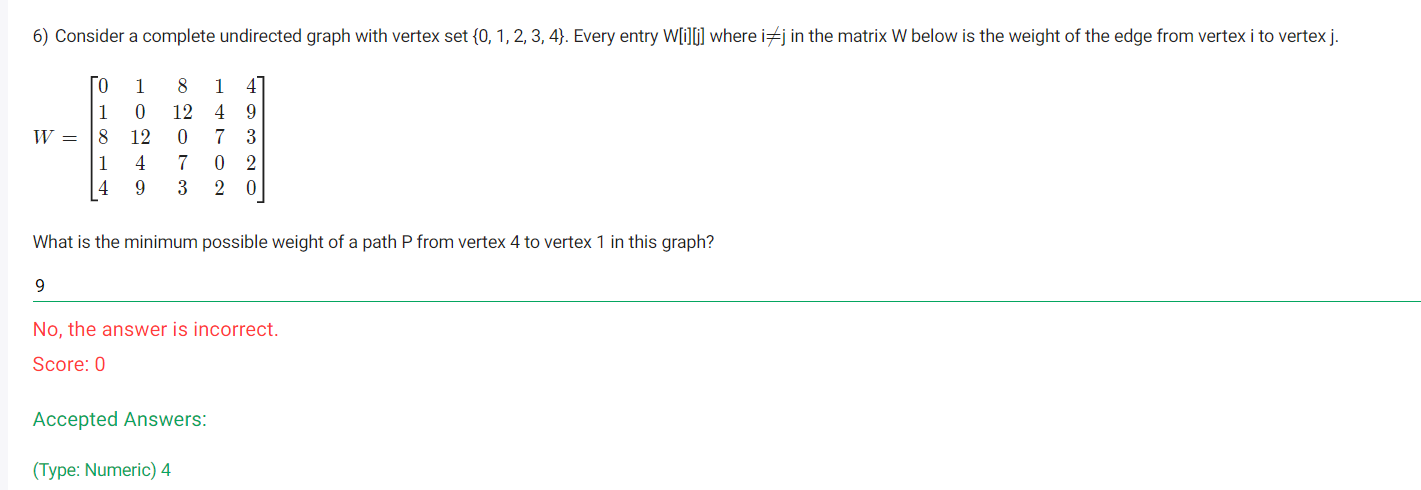

### 9.
 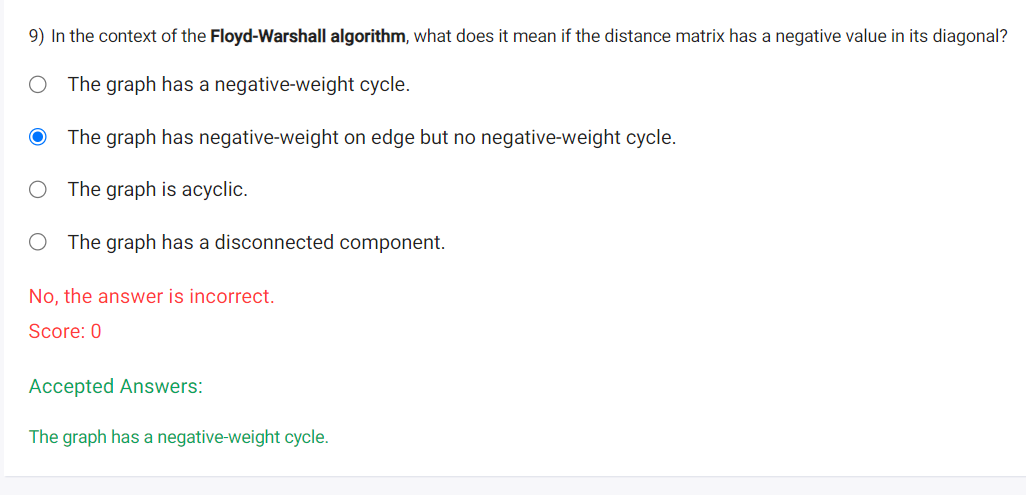

### GRPA 2

In [5]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]


pq = PriorityQueue()

pq.enqueue(8, 'ABC')
pq.enqueue(9, 'DEF')
print(pq.dequeue())
print(pq.dequeue())

ABC
DEF


In [11]:
def dijkstra(adj_list, start):
  visited = {vertex: False for vertex in adj_list}
  predecessor = {vertex: None for vertex in adj_list}
  distance = {vertex: float('inf') for vertex in adj_list}

  distance[start] = 0
  pq = PriorityQueue()
  pq.enqueue(0, start)

  while not pq.is_empty():
    curr_vertex = pq.dequeue()
    visited[curr_vertex] = True

    # print(f'{curr_vertex}')

    for neighbor, weight in adj_list[curr_vertex]:
      if not visited[neighbor]:
        new_distance = distance[curr_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)
          predecessor[neighbor] = curr_vertex
  return distance, predecessor


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A')

({'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6},
 {'A': None, 'B': 'C', 'C': 'A', 'D': 'B', 'E': 'B'})

In [12]:
def construct_path(predecessor, destination):
  path = []
  while destination is not None:
    path.append(destination)
    destination = predecessor[destination]
  path.reverse()
  return path

def min_cost_walk(adj_list, S,D,V):
  dist_S, predecessor_S = dijkstra(adj_list, S)
  dist_V, predecessor_V = dijkstra(adj_list, V)

  path_S = construct_path(predecessor_S,V)
  path_V = construct_path(predecessor_V, D)

  print(f'{dist_S} {predecessor_S=} {path_S}')
  print(f'{dist_V} {predecessor_V=} {path_V}')

  total_distance = dist_S[V] + dist_V[D]
  walk_route = path_S[:-1]+ path_V
